In [1]:
import pandas as pd

import sqlite3
from sqlite3 import Error

import seaborn as sns

import numpy as np
from numpy import mean
from numpy import std

import matplotlib as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict



In [2]:
df = pd.read_excel("ampa_wmt_rto_hackathon_july-22_data.xlsx", sheet_name=['animal_data','shelter_data'])
animal_data = df['animal_data']
shelter_data = df['shelter_data']

## understanding Animal Data 

In [3]:
animal_data.columns

Index(['shelter_id', 'intake_date', 'Species', 'found_lng', 'found_lat',
       'outcome_lng', 'outcome_lat', 'distance_miles', 'found_address',
       'outcome_address'],
      dtype='object')

In [4]:
dt = animal_data[['shelter_id','Species','distance_miles']]

In [5]:
dt

,shelter_id,Species,distance_miles
0,Rochester,Dog,0.085445
1,Rochester,Dog,1.245466
2,Rochester,Dog,0.528722
3,Rochester,Dog,0.163735
4,Rochester,Dog,0.170467
...,...,...,...
23075,Atlanta,Dog,1.536071
23076,Atlanta,Dog,0.046022
23077,Atlanta,Dog,0.090819
23078,Atlanta,Dog,0.124132


<Figure size 1152x2160 with 0 Axes>

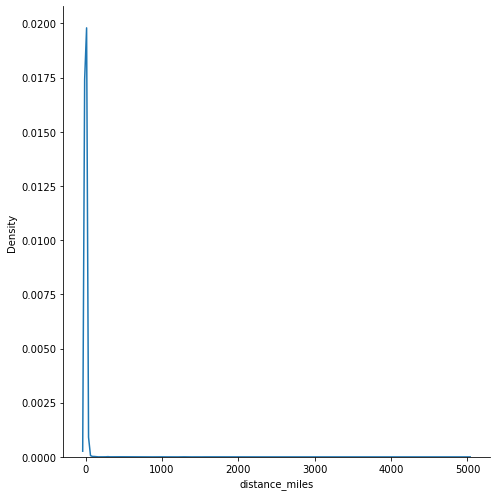

In [6]:
plt.figure(figsize=(16, 30))
g = sns.displot(data=dt, x="distance_miles", kind= "kde", height = 7)

most of the animals were found close to the outcome address and were able to be returned 

In [7]:
dt['shelter_id'].unique()

array(['Rochester', 'Oakland', 'Fresno', 'Mcallen', 'Tucson', 'Madera',
       'Las Vegas', 'Dallas', 'San Diego', 'Pasco', 'Atlanta'],
      dtype=object)

In [35]:
keys = [1,2,3,4,5,6,7,8,9,10,11]
x = dict(zip(dt['shelter_id'].unique(), keys))
x

{'Rochester': 1,
 'Oakland': 2,
 'Fresno': 3,
 'Mcallen': 4,
 'Tucson': 5,
 'Madera': 6,
 'Las Vegas': 7,
 'Dallas': 8,
 'San Diego': 9,
 'Pasco': 10,
 'Atlanta': 11}

In [9]:
dt2=dt.replace({"shelter_id": x})

In [10]:
dt2

,shelter_id,Species,distance_miles
0,1,Dog,0.085445
1,1,Dog,1.245466
2,1,Dog,0.528722
3,1,Dog,0.163735
4,1,Dog,0.170467
...,...,...,...
23075,11,Dog,1.536071
23076,11,Dog,0.046022
23077,11,Dog,0.090819
23078,11,Dog,0.124132


In [11]:
dt['Species'].unique()

array(['Dog', 'Cat', 'Pet Reptile', 'Pig', 'Horse', 'Rabbit', 'DOG', nan,
       'Other'], dtype=object)

In [12]:
dt2.loc[dt2['Species'] == "DOG", "Species"] = 'Dog'

In [13]:
dt2['Species'].unique()

array(['Dog', 'Cat', 'Pet Reptile', 'Pig', 'Horse', 'Rabbit', nan,
       'Other'], dtype=object)

In [14]:
dt2['Species'].nunique()

7

In [73]:
dt2.nunique()

shelter_id           11
Species               7
distance_miles    18458
dtype: int64

In [15]:
keys2 = [101,102,103,104,105,106,100,107]
y = dict(zip(dt2['Species'].unique(), keys2))
y

{'Dog': 101,
 'Cat': 102,
 'Pet Reptile': 103,
 'Pig': 104,
 'Horse': 105,
 'Rabbit': 106,
 nan: 100,
 'Other': 107}

In [16]:
dt3=dt2.replace({"Species": y})

In [17]:
dt3['Species'].unique()

array([101, 102, 103, 104, 105, 106, 100, 107])

In [18]:
dt3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23080 entries, 0 to 23079
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shelter_id      23080 non-null  int64  
 1   Species         23080 non-null  int64  
 2   distance_miles  23054 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 541.1 KB


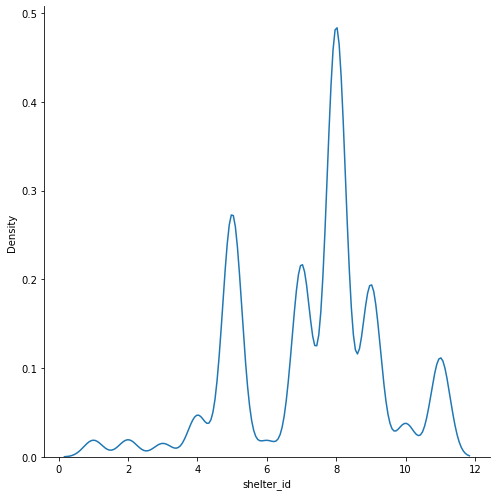

In [33]:
sns.displot(data=dt3,  x="shelter_id", kind="kde",height = 7)

denisity of most animals are at shlter id 8 being dallas 

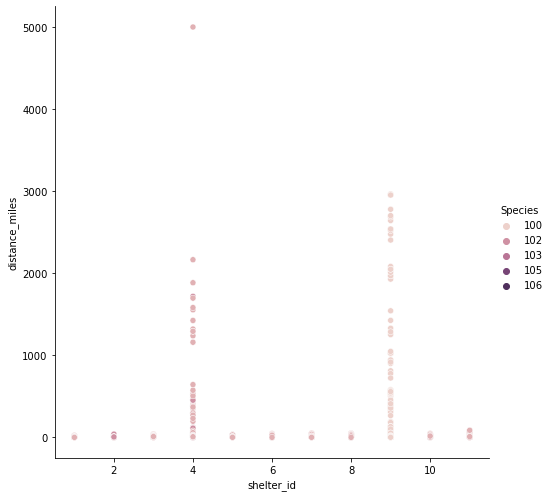

In [20]:
ax = sns.relplot(data=dt3, x="shelter_id", y="distance_miles",hue = "Species",height = 7)
g.ax.axline(xy1=(10, 10), slope=.2, color="b", dashes=(5, 2))

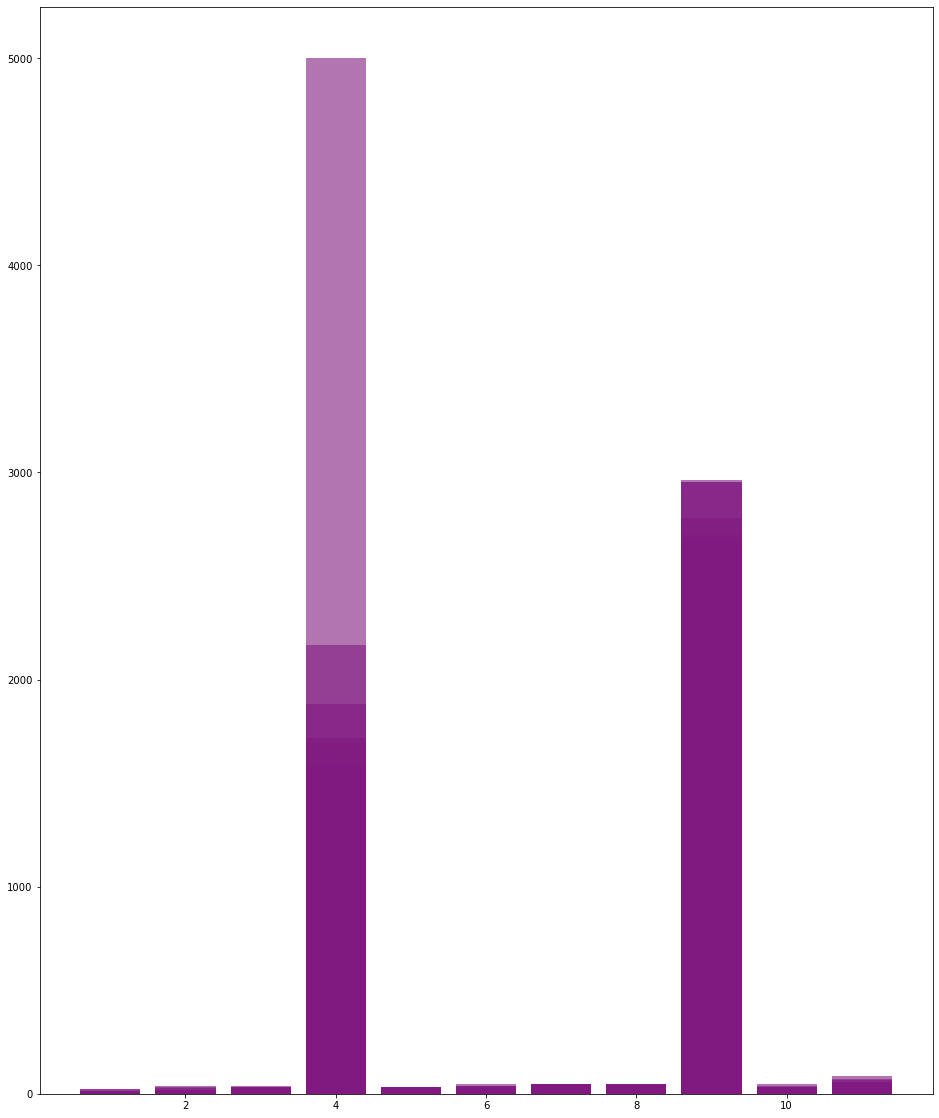

In [34]:
plt.figure(figsize=(16, 20))
plt.bar(dt3.shelter_id, dt3.distance_miles, color = (0.5,0.1,0.5,0.6))
plt.show()

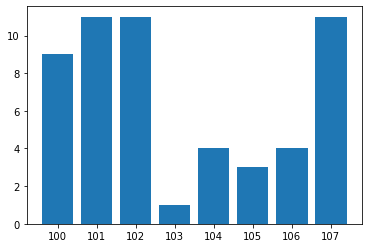

In [30]:

plt.bar(dt3.Species, dt3.shelter_id,)
plt.show()

## understanding shelter Data 

In [36]:
shelter_data = df['shelter_data']

In [37]:
shelter_data

,shelter_id,annual_intake_2019,annual_intake_2020,annual_intake_2021,jurisdiction_size_sq_km,justidiction_state,jurisdiction_region,jurisdiction_pop_size,jurisdiction_pop_density_person_per_sq_km
0,Rochester,3867,2732.0,2677.0,3541,NY,Monroe County,741770,209.480373
1,Oakland,6188,5234.0,7613.0,1914,CA,Alameda County,1682353,878.972309
2,Fresno,8001,6246.0,6634.0,15568,CA,Fresno County,999101,64.176580
3,Mcallen,21815,15511.0,15283.0,4100,TX,Hidalgo County,868707,211.879756
4,Tucson,27064,17547.0,23940.0,23799,AZ,Pima County,1043433,43.843565
5,Madera,5166,NaN,NaN,5576,CA,Madera County,156255,28.022776
6,Las Vegas,27922,17957.0,NaN,20878,NV,Clark County,2265461,108.509484
7,Dallas,40155,19594.0,18533.0,1992,TX,Dallas City,1304379,654.808735
8,San Diego,33555,31871.0,30803.0,11036,TX,San Diego County,3338000,302.464661
9,Pasco,9906,11370.0,6510.0,2250,FL,Pasco County,553947,246.198667


In [50]:
dfnew = shelter_data[['shelter_id','annual_intake_2019','annual_intake_2020','annual_intake_2021']]

<AxesSubplot:xlabel='shelter_id'>

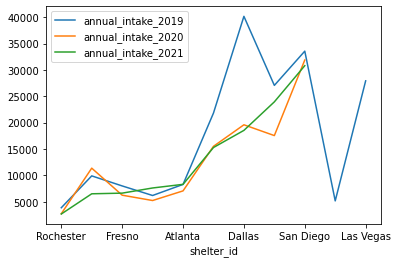

In [55]:
dfnew.set_index('shelter_id').plot()

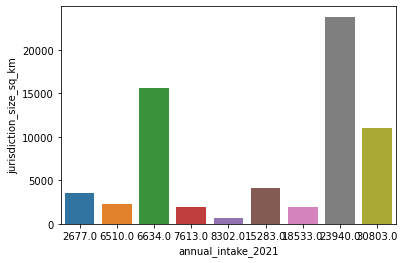

In [71]:
ax = sns.barplot(data=shelter_data, x = 'annual_intake_2021'  , y = 'jurisdiction_size_sq_km')

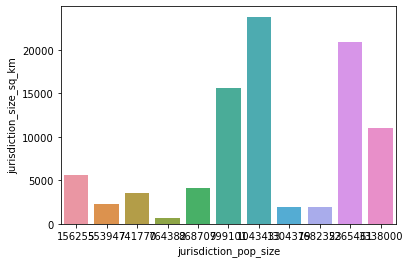

In [72]:
ax = sns.barplot(data=shelter_data, x = 'jurisdiction_pop_size'  , y = 'jurisdiction_size_sq_km')

## observations from graphs 

from the above graphs we understand 
- shelter in dallas tho less in size compared to other shlters has more density of animal intake and has increased this intake stedily over the years . 
- Dallas shelter has the highest size/pop ratio helping with the animal adoptation number 
- Most number of species in the shelters are dogs and cats  